In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Anda bisa mengunggah file dari komputer Anda ke Colab menggunakan perintah berikut:
# from google.colab import files
# uploaded = files.upload()

# Jika Anda memiliki file di Google Drive, Anda bisa mengaksesnya seperti ini:
# from google.colab import drive
# drive.mount('/content/drive')

# Menampilkan semua file dalam direktori tertentu (misal: /content) di Colab
# !ls /content

# Gunakan `os.listdir` untuk melihat file dalam direktori, jika diperlukan
import os
for dirname, _, filenames in os.walk('/content/goldprices.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Anda bisa menulis hingga 20GB ke direktori saat ini (/content)
# File-file sementara bisa disimpan di /tmp/, namun tidak akan tersimpan di luar sesi saat ini


In [ ]:
from keras.models import Model, Sequential
from keras.layers import LSTM, GRU, Dropout
from keras.layers import Dense, Input
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import concatenate
from keras.layers import Bidirectional
from keras.utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import math

In [ ]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
def ConcaveLSTM(n=100, n_steps_in=30, n_features=1) :
    inp = Input(shape=(n_steps_in, n_features), name="Input")
    stack = LSTM(n, activation="relu", return_sequences=True, input_shape=(n_steps_in, n_features), name="Stack1") (inp)
    stack = Dropout(0.2) (stack)
    stack = LSTM(n, activation='relu', return_sequences=True) (stack)
    stack = Dropout(0.2) (stack)
    stack = LSTM(n, activation='relu') (stack)

    bidir = Bidirectional(LSTM(n, activation='relu'), input_shape=(n_steps_in, n_features), name="Bidirect") (inp)

    merge = concatenate([stack, bidir])

    output = Dense(n_features, name="Output") (merge)

    model = Model(inputs=inp, outputs=output)
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
dataraw = pd.read_csv('/content/goldprices.csv')
dataraw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
3,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0


In [ ]:
dataraw.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5312,2021-07-12,1802.599976,1805.500000,1799.500000,1805.500000,1805.500000,218.0
5313,2021-07-13,1808.099976,1812.000000,1800.599976,1809.400024,1809.400024,147.0
5314,2021-07-14,1813.099976,1829.000000,1813.099976,1824.300049,1824.300049,707.0
5315,2021-07-15,1831.599976,1833.000000,1823.400024,1828.400024,1828.400024,99.0
5316,2021-07-16,1830.099976,1831.400024,1814.500000,1814.500000,1814.500000,99.0


In [ ]:
dataraw.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000
mean,1018.675312,1023.820096,1013.118867,1018.535524,1018.535524,4257.242651
std,490.316244,493.277232,486.969047,490.177751,490.177751,24536.337729
min,255.000000,256.100006,255.000000,255.100006,255.100006,0.000000
25%,485.600006,486.000000,486.000000,489.000000,489.000000,18.000000
50%,1174.599976,1180.300049,1168.300049,1174.599976,1174.599976,95.000000
75%,1334.500000,1341.400024,1326.900024,1335.099976,1335.099976,357.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


In [ ]:
dataset = dataraw['Close']
dataset = dataset.dropna()
dataset.head()

,Close
0,273.899994
1,278.299988
2,277.000000
4,275.799988
5,274.200012


In [ ]:
dataset.tail()

,Close
5312,1805.500000
5313,1809.400024
5314,1824.300049
5315,1828.400024
5316,1814.500000


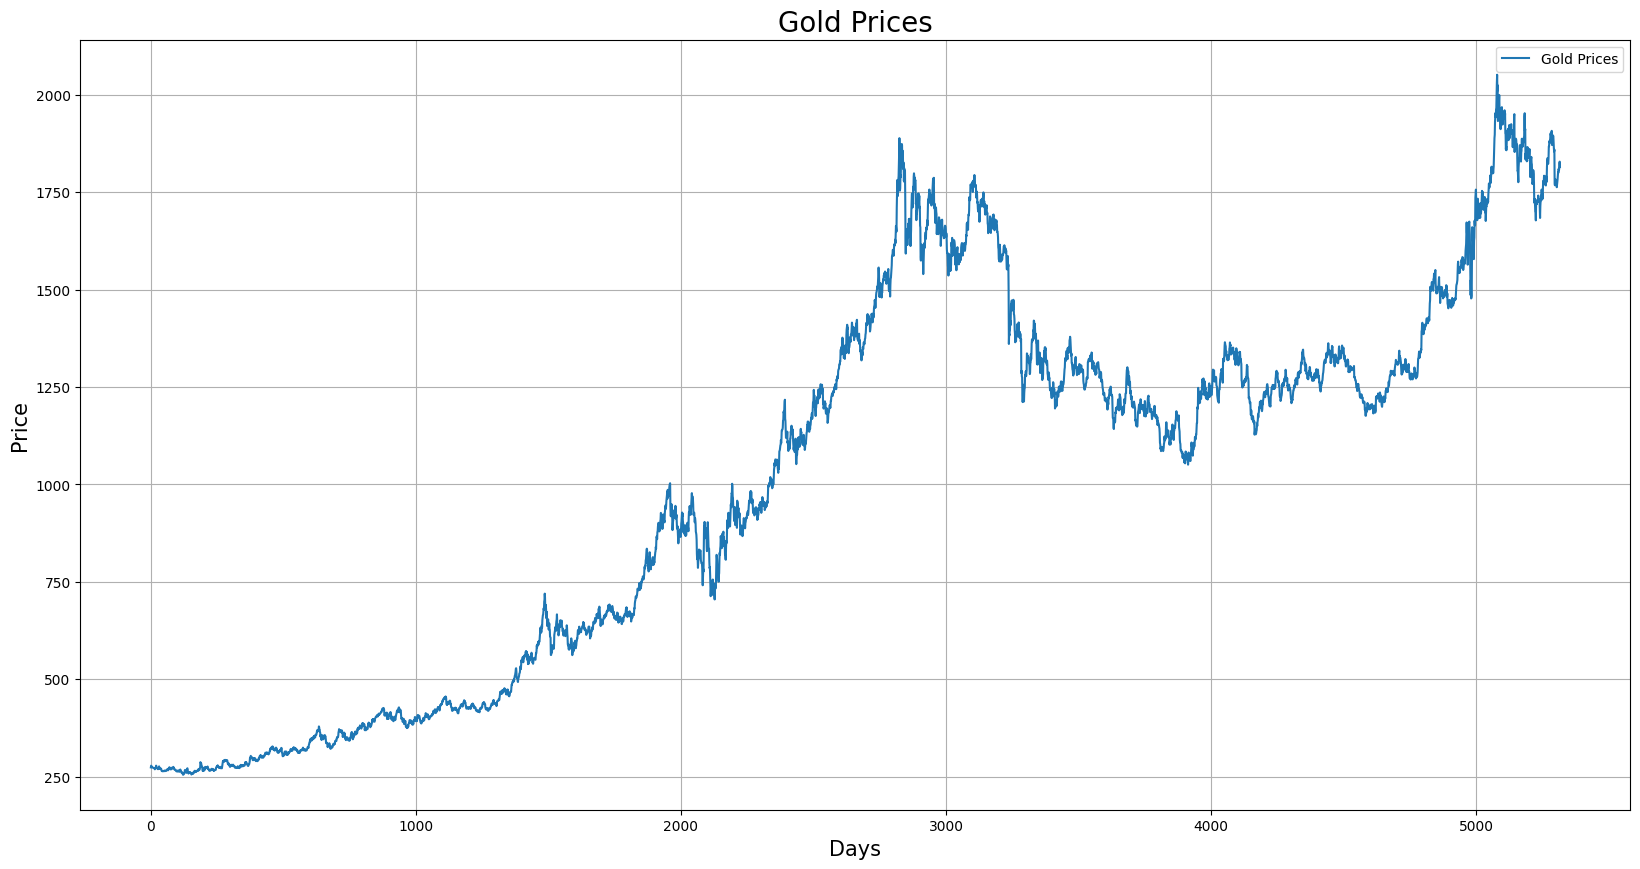

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(dataset, label='Gold Prices')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Days', fontsize = 15 )
plt.title('Gold Prices', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
dataset.describe()

,Close
count,5205.000000
mean,1018.535524
std,490.177751
min,255.100006
25%,489.000000
50%,1174.599976
75%,1335.099976
max,2051.500000


In [ ]:
dmax = dataset.max()
dmin = dataset.min()
dfx = (dataset - dmin) / (dmax - dmin)
data = dfx.to_list()

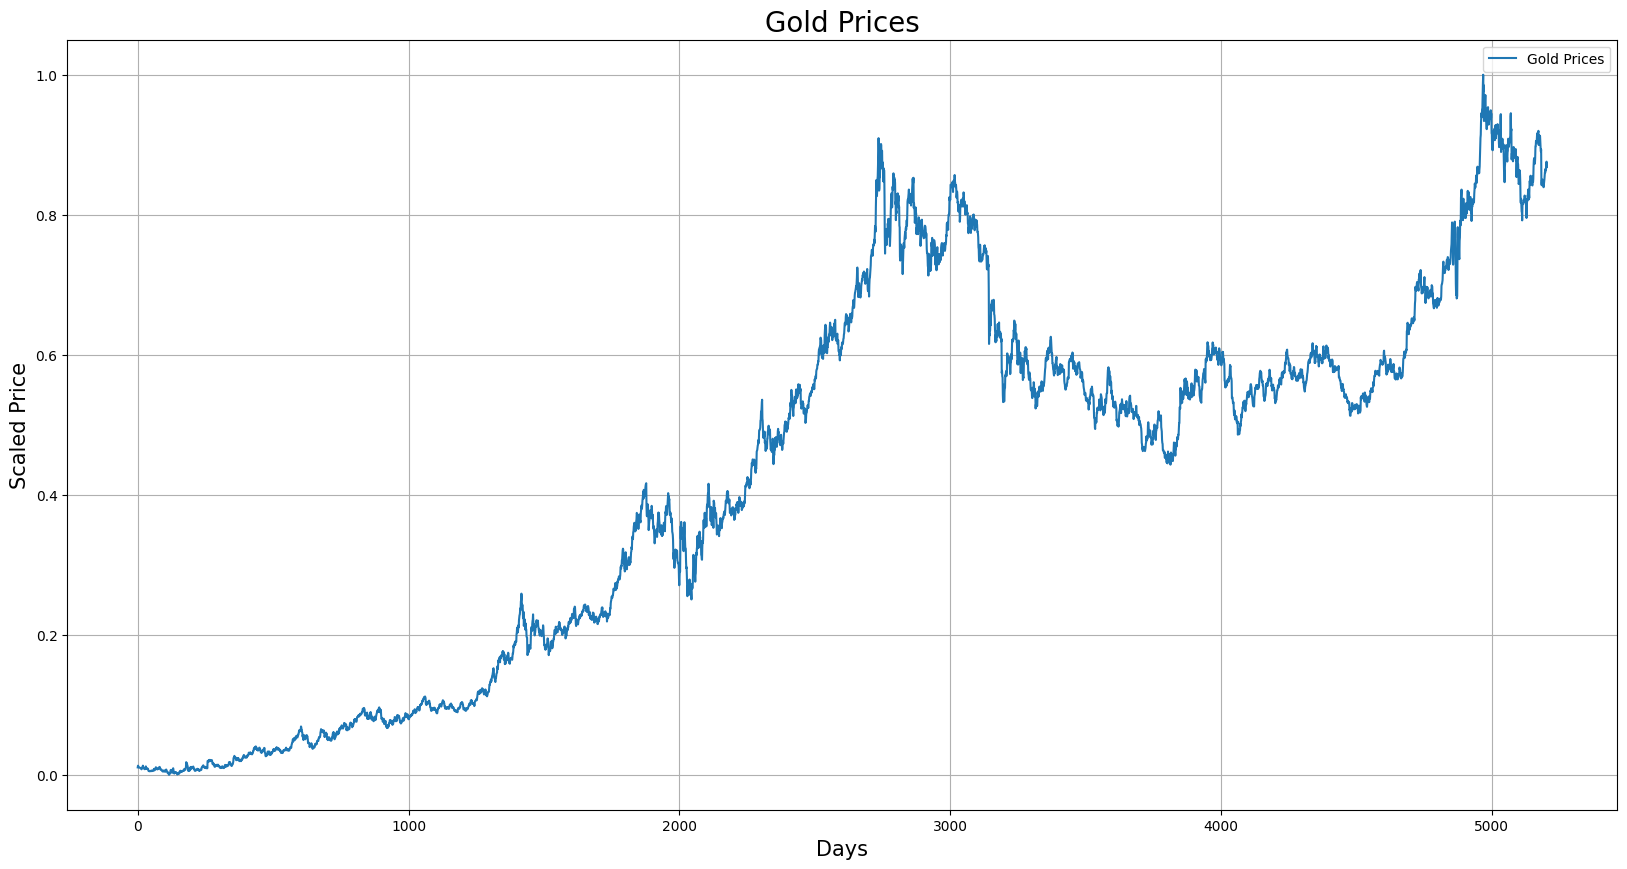

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(data, label='Gold Prices')
plt.ylabel('Scaled Price', fontsize = 15 )
plt.xlabel('Days', fontsize = 15 )
plt.title('Gold Prices', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
n_steps_in = 70 # [30, 50, 70]
n_units = 300 # [100, 200, 300]
n_steps_out = 40
n_features = 1

In [ ]:
data_test = data[-n_steps_in-n_steps_out-1:]
data_train = data[:-n_steps_in-n_steps_out-1]
X, y = split_sequence(data_train, n_steps_in)
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
model = ConcaveLSTM(n_units, n_steps_in, n_features)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)        │ (None, 70, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Stack1 (LSTM)             │ (None, 70, 300)        │        362,400 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 70, 300)        │              0 │ Stack1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 70, 300)        │        721,200 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 70, 300)        │              0 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 300)            │        721,200 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Bidirect (Bidirectional)  │ (None, 600)            │        724,800 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 900)            │              0 │ lstm_1[0][0],          │
│                           │                        │                │ Bidirect[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Output (Dense)            │ (None, 1)              │            901 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,530,501 (9.65 MB)

 Trainable params: 2,530,501 (9.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(X, y, epochs=10, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - loss: 0.0206 - val_loss: 6.1286e-04
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - loss: 4.4761e-04 - val_loss: 3.7847e-04
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - loss: 3.4954e-04 - val_loss: 3.7979e-04
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - loss: 2.9415e-04 - val_loss: 6.0098e-04
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - loss: 2.5630e-04 - val_loss: 2.3168e-04
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - loss: 1.9313e-04 - val_loss: 2.5033e-04
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - loss: 1.9979e-04 - val_loss: 3.2389e-04
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - loss: 1.7882e-04 - val_loss: 1.9355e-04
Epoch 9/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - loss: 1.6596e-04 - val_loss: 2.1911e-04
Epoch 10/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - loss: 1.6930e-04 - val_loss: 3.3973e-04


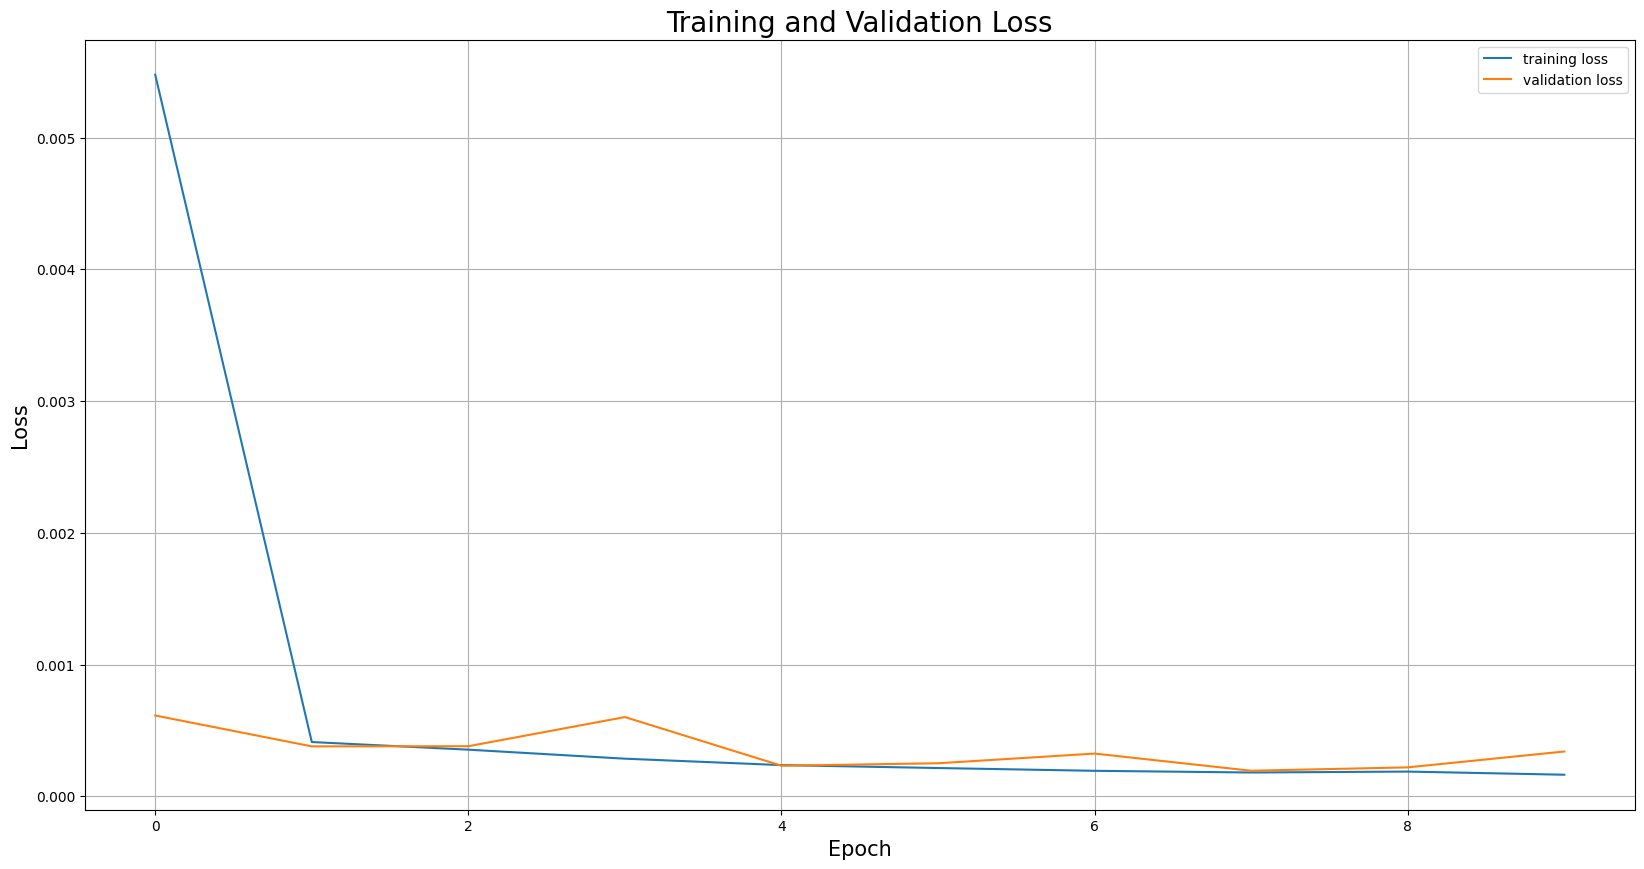

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.ylabel('Loss', fontsize = 15 )
plt.xlabel('Epoch', fontsize = 15 )
plt.title('Training and Validation Loss', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
datauji = len(data_test) - n_steps_in
aktual = data_test[-datauji-1:-2]
prediksi = []

for i in range(n_steps_out):
    x_input = np.array(data_test[-n_steps_in-datauji+i:-datauji+i])
    x_input = x_input.reshape((1, n_steps_in, n_features))
    yhat = model.predict(x_input, verbose=0)
    prediksi.append(yhat[0][0])

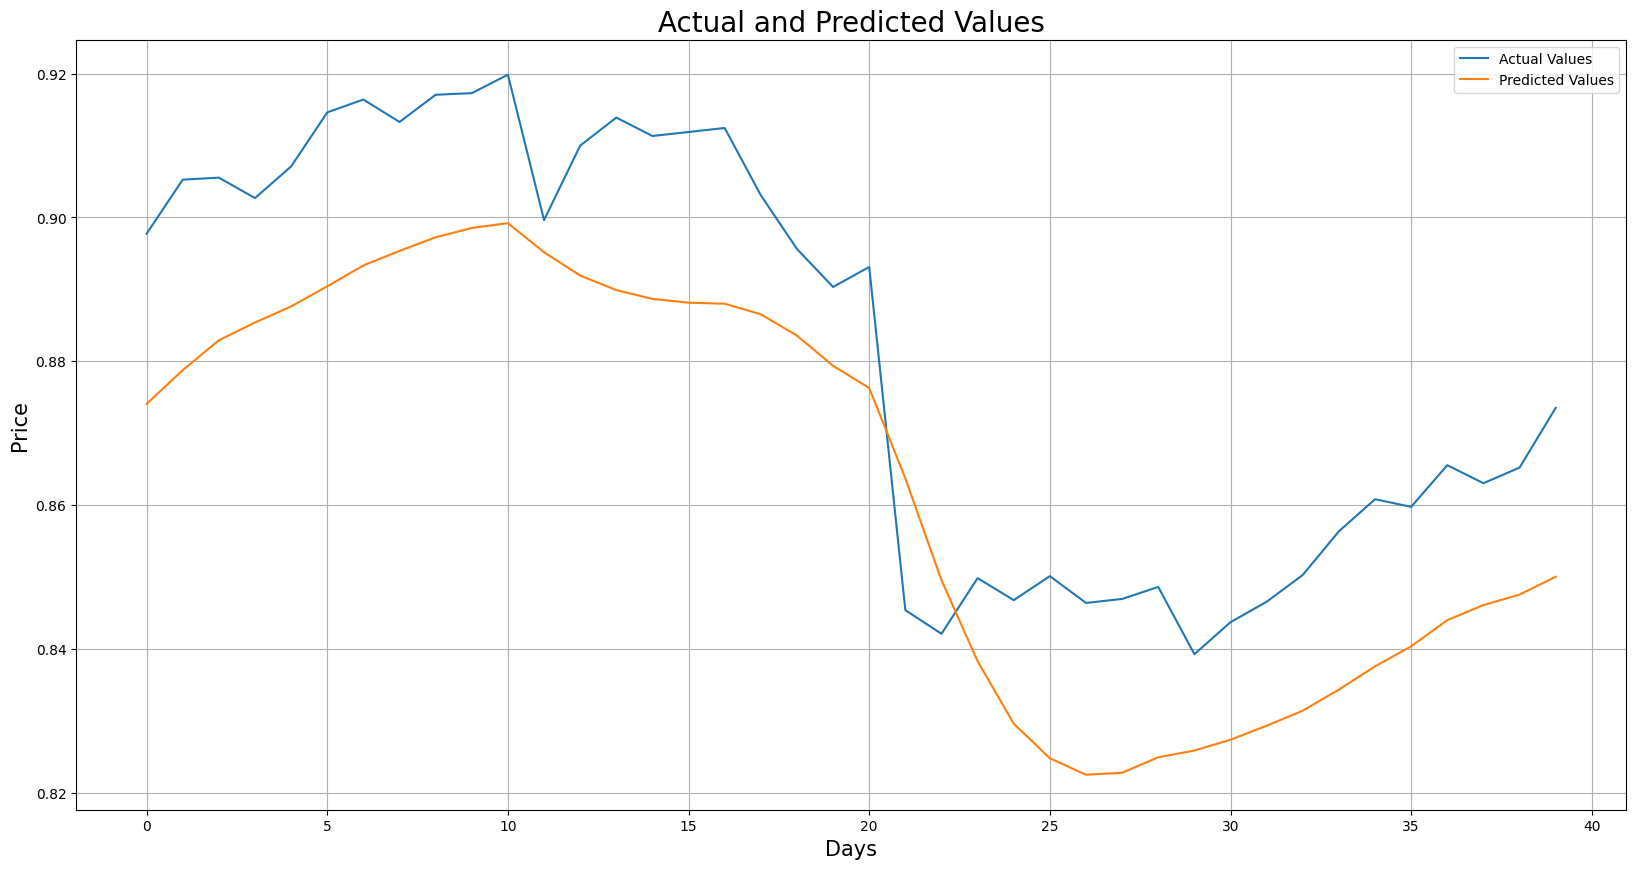

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(aktual, label='Actual Values')
plt.plot(prediksi, label='Predicted Values')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Days', fontsize = 15 )
plt.title('Actual and Predicted Values', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
RMSE = math.sqrt(mean_squared_error(aktual, prediksi))
MAE = mean_absolute_error(aktual, prediksi)
MAPE = mean_absolute_percentage_error(aktual, prediksi)
R2 = r2_score(aktual, prediksi)

print('RMSE :', RMSE)
print('MAE :', MAE)
print('MAPE :', MAPE)
print('R2 :', R2)

RMSE : 0.019848839965044524
MAE : 0.019227492987671974
MAPE : 0.021803810639317626
R2 : 0.5235783988465483
